<h2>Practical Tasks. Lesson 7<h2>

<h3>Import modules<h3>

In [149]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Load dataset

In [150]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

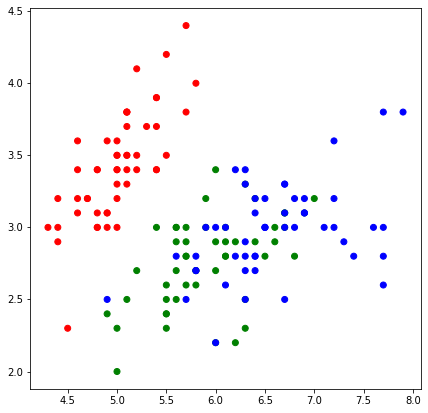

In [152]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

common functions

In [153]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [154]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [168]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .05

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

<h3>Task-1 and Task-3<h3>

In [172]:
def knn(x_train, y_train, x_test, k):
    # ИЗМЕНЕНИЕ
    # 1. считаем расстояние от каждой тестовой точки до всех тренировочных точек в векторной форме
    # 2. Добавляем веса как q**i, i - индекс элемента, индексы присваиваем в соотвествие с близостью к исследуемой точке
    answers = []
    
    distances = np.sqrt(((x_test[:, :, None] - x_train[:, :, None].T) ** 2).sum(1))
    for row in distances:
        test_distances = list(sorted(zip(row, y_train)))
        classes = {class_item: 0 for class_item in set(y_train)}
        for i, d in enumerate(test_distances[0:k]):
            classes[d[1]] += 0.5**(i)
        answers.append(sorted(classes, key=classes.get)[-1])
    
    # old version
    # for x in x_test:
    #     distances = np.sqrt(((x_train - x.reshape(1, -1))**2).sum(1))
    #     test_distances = list(sorted(zip(distances, y_train)))
    #     classes = {class_item: 0 for class_item in set(y_train)}
    #     for i, d in enumerate(test_distances[0:k]):
    #         classes[d[1]] += 0.5**(i)
    #     answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [173]:
%%time
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.700
Wall time: 16 ms


(9408, 2)


<ipython-input-168-2e5b4dd8f9a8>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


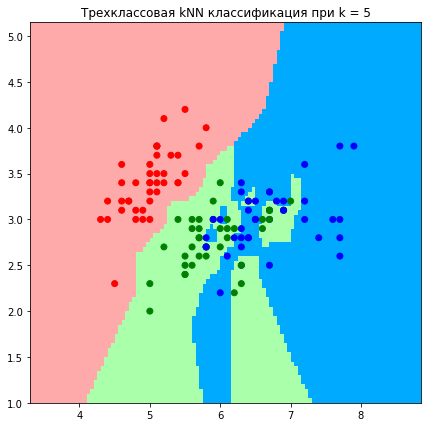

Wall time: 3.96 s


In [174]:
%%time
get_graph(X_train, y_train, k)

<h3>Task 2<h3>

In [175]:
# ИЗМЕНЕНИЕ
def e2_metrics(x1, x2):
    return np.sum(np.square(x1 - x2))

In [176]:
# ИЗМЕНЕНИЕ
def mean_squared_intracluster_distance(centroids, clusters):
    metric = 0
    for cluster in clusters.items():
        cluster_num, cluster_points = cluster
        metric +=  sum(list(map(lambda x: e2_metrics(x, centroids[cluster_num]), cluster_points))) / len(cluster_points)
    return metric

Code from lesson

In [177]:
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=100, random_state=1)
# X, y = make_moons(n_samples=100, noise=0.05, random_state=1)

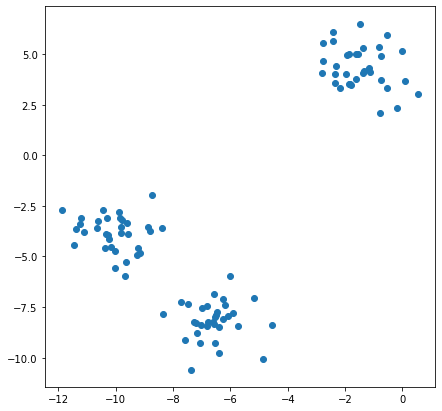

In [178]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])

In [179]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [180]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

Run K-means at different cluster numbers and plot "error - cluster number" graph

In [181]:
# определим максимальное количество итераций
max_iterations = 5

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = [i for i in range(1, 11, 1)]
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [182]:
results = []
for cluster_number in k:
    centroids, clusters = kmeans(X, cluster_number, max_iterations, min_distance)
    results.append(mean_squared_intracluster_distance(centroids, clusters))

Text(0, 0.5, 'Mean squared intracluster distance')

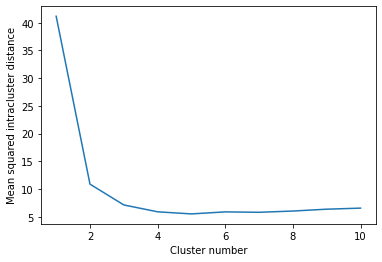

In [183]:
plt.plot(k, results)
plt.xlabel('Cluster number')
plt.ylabel('Mean squared intracluster distance')

По методу локтя оптимальное число кластеров равняется трем в соответствие с интуитивными ожиданиями